In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#Cargamos los datos
data = pd.read_csv('DataAnalytics.csv')
data

,Administrador,Usuario,boton correcto,tiempo de interaccion,mini juego,numero de interaccion,color presionado,dificultad,fecha,Juego,auto push,tiempo de leccion,tiempo de sesion
0,nicolas,nicolas,1.0,5.399169,Despegue,1.0,blue,Episodio 1,25/01/2024 09:26,Astro,0.0,0.000000,0.000000
1,nicolas,nicolas,0.0,1.283400,Despegue,2.0,violet,Episodio 1,25/01/2024 09:26,Astro,0.0,0.000000,0.000000
2,nicolas,nicolas,1.0,2.700226,Despegue,3.0,green,Episodio 1,25/01/2024 09:26,Astro,0.0,0.000000,0.000000
3,nicolas,nicolas,0.0,3.050262,Despegue,4.0,green,Episodio 1,25/01/2024 09:26,Astro,0.0,0.000000,0.000000
4,nicolas,nicolas,0.0,4.750256,Despegue,5.0,green,Episodio 1,25/01/2024 09:26,Astro,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860,ALEIDA,ESMERALDA,NaN,NaN,NaN,NaN,NaN,Episodio 1,28/05/2024 16:15,Astro,NaN,NaN,332.240000
5861,ALEIDA,JOSE JAVIER,0.0,2.135419,Asteroides,1.0,green,Episodio 3,04/06/2024 11:09,Astro,0.0,0.000000,0.000000
5862,ALEIDA,JOSE JAVIER,NaN,NaN,Asteroides,NaN,NaN,Episodio 3,04/06/2024 11:09,Astro,NaN,2.271806,NaN
5863,ALEIDA,JOSE JAVIER,NaN,NaN,NaN,NaN,NaN,Episodio 3,04/06/2024 11:09,Astro,NaN,NaN,6.478299


In [7]:
valores_nulos = data.isnull().sum()
print(valores_nulos)

Administrador              0
Usuario                    0
boton correcto           762
tiempo de interaccion    762
mini juego               156
numero de interaccion    762
color presionado         762
dificultad                 0
fecha                      0
Juego                      0
auto push                762
tiempo de leccion        177
tiempo de sesion         606
dtype: int64


In [8]:
numericas = data.select_dtypes(include=['int64', 'float64'])
cualitativas = data.select_dtypes(include=['object'])

numericas_generales = numericas.drop(['tiempo de sesion', 'tiempo de leccion'], axis=1)
numericas_generales_sin_nulos = numericas_generales.fillna(numericas_generales.mean())

In [9]:
tiempo_sesion = numericas['tiempo de sesion']
tiempo_leccion = numericas['tiempo de leccion']

media_sesion_sin_ceros = tiempo_sesion.mean()
media_leccion_sin_ceros = tiempo_leccion.mean()

tiempo_sesion_sin_nulos = tiempo_sesion.fillna(media_sesion_sin_ceros)
tiempo_leccion_sin_nulos = tiempo_leccion.fillna(media_leccion_sin_ceros)

In [10]:
numericas_con0 = pd.concat([tiempo_sesion_sin_nulos, tiempo_leccion_sin_nulos], axis=1)

<Figure size 1500x1000 with 0 Axes>

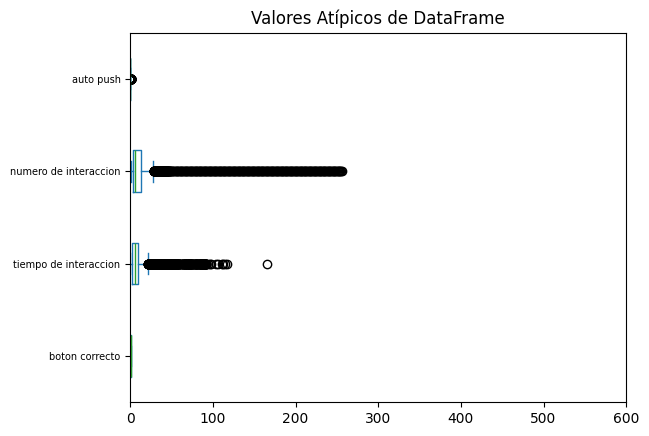

In [11]:
fig = plt.figure(figsize = (15,10))
numericas_generales_sin_nulos.plot(kind='box', vert=False)
plt.xlim([0, 600])
plt.title('Valores Atípicos de DataFrame')
plt.yticks(fontsize=7, rotation=0)
plt.show()

In [12]:
y=numericas_generales_sin_nulos

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido boton correcto            2.50000
tiempo de interaccion    21.81771
numero de interaccion    28.84852
auto push                 0.00000
dtype: float64
Limite inferior permitido boton correcto           -1.500000
tiempo de interaccion    -9.731186
numero de interaccion   -12.509112
auto push                 0.000000
dtype: float64


In [13]:
data2_iqr= numericas_generales_sin_nulos[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data2_iqr.head(5)

,boton correcto,tiempo de interaccion,numero de interaccion,auto push
0,1.0,5.399169,1.0,0.0
1,0.0,1.283400,2.0,0.0
2,1.0,2.700226,3.0,0.0
3,0.0,3.050262,4.0,0.0
4,0.0,4.750256,5.0,0.0


In [14]:
valores_nulos2=data2_iqr.isnull().sum()
valores_nulos2

boton correcto             0
tiempo de interaccion    669
numero de interaccion    371
auto push                816
dtype: int64

In [15]:
data3_iqr=data2_iqr.copy()
data3_iqr=data2_iqr.fillna(round(data2_iqr.mean(),1))
data3_iqr.head(10)

,boton correcto,tiempo de interaccion,numero de interaccion,auto push
0,1.0,5.399169,1.0,0.0
1,0.0,1.283400,2.0,0.0
2,1.0,2.700226,3.0,0.0
3,0.0,3.050262,4.0,0.0
4,0.0,4.750256,5.0,0.0
5,0.0,7.400463,6.0,0.0
6,0.0,13.167350,7.0,0.0
7,1.0,5.900000,8.0,0.0
8,0.0,14.517180,9.0,0.0
9,0.0,15.617350,10.0,0.0


<Figure size 1500x1000 with 0 Axes>

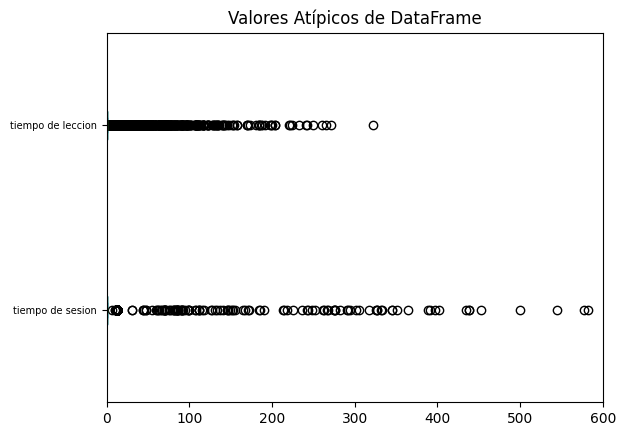

In [16]:
fig = plt.figure(figsize = (15,10))
numericas_con0.plot(kind='box', vert=False)
plt.xlim([0, 600])
plt.title('Valores Atípicos de DataFrame')
plt.yticks(fontsize=7, rotation=0)
plt.show()

In [17]:
y = numericas_con0

percentile1 = y.quantile(0.01) 
percentile99 = y.quantile(0.99)  

print("Límite superior permitido: ", percentile99)
print("Límite inferior permitido: ", percentile1)

Límite superior permitido:  tiempo de sesion     296.973188
tiempo de leccion    118.946856
Name: 0.99, dtype: float64
Límite inferior permitido:  tiempo de sesion     0.0
tiempo de leccion    0.0
Name: 0.01, dtype: float64


In [18]:
data4_iqr = numericas_con0[(y<=percentile99)&(y>=percentile1)]
data4_iqr.head(5)

,tiempo de sesion,tiempo de leccion
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [19]:
valores_nulos3=data4_iqr.isnull().sum()
valores_nulos3

tiempo de sesion     59
tiempo de leccion    59
dtype: int64

In [20]:
data5_iqr=data4_iqr.copy()
data5_iqr=data4_iqr.fillna(round(data4_iqr.mean(),1))
data5_iqr.head(10)

,tiempo de sesion,tiempo de leccion
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


In [21]:
valores_nulos4=data5_iqr.isnull().sum()
valores_nulos4

tiempo de sesion     0
tiempo de leccion    0
dtype: int64

In [22]:
data_final = pd.concat([cualitativas.fillna("Sin Dato"), data3_iqr, data5_iqr], axis=1)

In [23]:
valores_nulos5=data_final.isnull().sum()
valores_nulos5

Administrador            0
Usuario                  0
mini juego               0
color presionado         0
dificultad               0
fecha                    0
Juego                    0
boton correcto           0
tiempo de interaccion    0
numero de interaccion    0
auto push                0
tiempo de sesion         0
tiempo de leccion        0
dtype: int64

In [24]:
cat1 = data_final.groupby(['Administrador'])['Administrador'].count().sort_values(ascending=False)
cat1

Administrador
ALEIDA            3260
nicolas            440
LEONARDO           371
DENISSE            302
SERGIO ANGEL       243
CARLOS ENRIQUE     228
YAEL DAVID         224
AUSTIN             199
VALENTIN           163
erick              158
IKER BENJAMIN      128
KYTZIA              98
BENJAMIN            51
Name: Administrador, dtype: int64

In [25]:
data_final.Administrador = data_final.Administrador.replace({'ALEIDA':'1'}, regex=False)
data_final.Administrador = data_final.Administrador.replace({'nicolas':'2'}, regex=False)
data_final.Administrador = data_final.Administrador.replace({'LEONARDO':'3'}, regex=False)
data_final.Administrador = data_final.Administrador.replace({'DENISSE':'4'}, regex=False)
data_final.Administrador = data_final.Administrador.replace({'SERGIO ANGEL':'5'}, regex=False)
data_final.Administrador = data_final.Administrador.replace({'CARLOS ENRIQUE':'6'}, regex=False)
data_final.Administrador = data_final.Administrador.replace({'YAEL DAVID':'7'}, regex=False)
data_final.Administrador = data_final.Administrador.replace({'AUSTIN':'8'}, regex=False)
data_final.Administrador = data_final.Administrador.replace({'VALENTIN':'9'}, regex=False)
data_final.Administrador = data_final.Administrador.replace({'erick':'10'}, regex=False)
data_final.Administrador = data_final.Administrador.replace({'IKER BENJAMIN':'11'}, regex=False)
data_final.Administrador = data_final.Administrador.replace({'KYTZIA':'12'}, regex=False)
data_final.Administrador = data_final.Administrador.replace({'BENJAMIN':'13'}, regex=False)

In [26]:
cat2 = data_final.groupby(['Usuario'])['Usuario'].count().sort_values(ascending=False)
cat2

Usuario
LEONARDO              546
ALEIDA                487
nicolas               440
JOSE JAVIER           394
LEONARDO              371
JESUS ALEJANDRO       356
ramiro isai           332
ADRIAN                280
SERGIO ANGEL          243
CARLOS ENRIQUE        228
DENISSE               228
YAEL DAVID            224
VALENTIN              163
erick                 158
IKER BENJAMIN         152
NICOLAS |             128
ERICK OSVALDO         126
CONCEPCION            103
KYTZIA                 98
AUSTIN                 96
JOSE IGNACIO TADEO     94
JOSE IAN               86
ASHLEY                 75
JOSHUA                 74
YEREMI YAZMIN          71
MA DEL ROSARIO         64
BENJAMIN               51
INGRID                 49
RENE                   44
CARLOS ABEL            39
ARLETT                 29
ESMERALDA              24
IRVING                 10
jesus eduardo           2
Name: Usuario, dtype: int64

In [27]:
data_final.Usuario = data_final.Usuario.replace({'LEONARDO':'1'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'ALEIDA':'2'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'nicolas':'3'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'JOSE JAVIER ':'4'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'LEONARDO ':'5'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'JESUS ALEJANDRO':'6'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'ramiro isai':'7'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'ADRIAN ':'8'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'SERGIO ANGEL':'9'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'CARLOS ENRIQUE':'10'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'DENISSE':'11'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'YAEL DAVID':'12'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'VALENTIN':'13'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'erick ':'14'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'IKER BENJAMIN':'15'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'NICOLAS |':'16'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'ERICK OSVALDO':'17'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'CONCEPCION':'18'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'KYTZIA':'19'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'AUSTIN':'20'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'JOSE IGNACIO TADEO':'21'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'JOSE IAN':'22'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'ASHLEY ':'23'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'JOSHUA':'24'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'YEREMI YAZMIN ':'25'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'MA DEL ROSARIO ':'26'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'BENJAMIN':'27'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'INGRID':'28'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'RENE ':'29'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'CARLOS ABEL':'30'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'ARLETT':'31'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'ESMERALDA':'32'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'IRVING ':'33'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'jesus eduardo':'34'}, regex=False)

In [28]:
cat3 = data_final.groupby(['mini juego'])['mini juego'].count().sort_values(ascending=False)
cat3

mini juego
Asteroides            1054
Restaurante            869
Estrellas              813
Gusanos                748
sonidos y animales     743
animales y colores     545
figuras y colores      400
partes del cuerpo      320
Despegue               196
Sin Dato               156
MiniGame_0               8
MiniGame_2               5
MiniGame_3               5
MiniGame_1               3
Name: mini juego, dtype: int64

In [29]:
data_final['mini juego'] = data_final['mini juego'].replace({'Asteroides':'1'}, regex=False)
data_final['mini juego'] = data_final['mini juego'].replace({'Restaurante':'2'}, regex=False)
data_final['mini juego'] = data_final['mini juego'].replace({'Estrellas':'3'}, regex=False)
data_final['mini juego'] = data_final['mini juego'].replace({'Gusanos':'4'}, regex=False)
data_final['mini juego'] = data_final['mini juego'].replace({'sonidos y animales':'5'}, regex=False)
data_final['mini juego'] = data_final['mini juego'].replace({'animales y colores':'6'}, regex=False)
data_final['mini juego'] = data_final['mini juego'].replace({'figuras y colores':'7'}, regex=False)
data_final['mini juego'] = data_final['mini juego'].replace({'partes del cuerpo':'8'}, regex=False)
data_final['mini juego'] = data_final['mini juego'].replace({'Despegue':'9'}, regex=False)
data_final['mini juego'] = data_final['mini juego'].replace({'Sin Dato':'10'}, regex=False)
data_final['mini juego'] = data_final['mini juego'].replace({'MiniGame_0':'11'}, regex=False)
data_final['mini juego'] = data_final['mini juego'].replace({'MiniGame_2':'12'}, regex=False)
data_final['mini juego'] = data_final['mini juego'].replace({'MiniGame_3':'13'}, regex=False)
data_final['mini juego'] = data_final['mini juego'].replace({'MiniGame_1':'14'}, regex=False)

In [30]:
cat4 = data_final.groupby(['color presionado'])['color presionado'].count().sort_values(ascending=False)
cat4

color presionado
violet      1361
green       1298
yellow      1233
blue        1182
Sin Dato     762
red           29
Name: color presionado, dtype: int64

In [31]:
data_final['color presionado'] = data_final['color presionado'].replace({'violet':'1'}, regex=False)
data_final['color presionado'] = data_final['color presionado'].replace({'green':'2'}, regex=False)
data_final['color presionado'] = data_final['color presionado'].replace({'yellow':'3'}, regex=False)
data_final['color presionado'] = data_final['color presionado'].replace({'blue':'4'}, regex=False)
data_final['color presionado'] = data_final['color presionado'].replace({'Sin Dato':'5'}, regex=False)
data_final['color presionado'] = data_final['color presionado'].replace({'red':'6'}, regex=False)

In [32]:
cat5 = data_final.groupby(['dificultad'])['dificultad'].count().sort_values(ascending=False)
cat5

dificultad
Episodio 1    2357
Episodio 2    1493
Episodio 3    1292
Episodio 4     723
Name: dificultad, dtype: int64

In [33]:
data_final['dificultad'] = data_final['dificultad'].replace({'Episodio 1':'1'}, regex=False)
data_final['dificultad'] = data_final['dificultad'].replace({'Episodio 2':'2'}, regex=False)
data_final['dificultad'] = data_final['dificultad'].replace({'Episodio 3':'3'}, regex=False)
data_final['dificultad'] = data_final['dificultad'].replace({'Episodio 4':'4'}, regex=False)

In [34]:
cat6 = data_final.groupby(['Juego'])['Juego'].count().sort_values(ascending=False)
cat6

Juego
Astro      3799
Cadetes    2066
Name: Juego, dtype: int64

In [35]:
data_final['Juego'] = data_final['Juego'].replace({'Astro':'1'}, regex=False)
data_final['Juego'] = data_final['Juego'].replace({'Cadetes':'2'}, regex=False)

In [36]:
data_final = data_final.drop(columns=['fecha'])
data_final

,Administrador,Usuario,mini juego,color presionado,dificultad,Juego,boton correcto,tiempo de interaccion,numero de interaccion,auto push,tiempo de sesion,tiempo de leccion
0,2,3,9,4,1,1,1.000000,5.399169,1.000000,0.0,0.000000,0.000000
1,2,3,9,1,1,1,0.000000,1.283400,2.000000,0.0,0.000000,0.000000
2,2,3,9,2,1,1,1.000000,2.700226,3.000000,0.0,0.000000,0.000000
3,2,3,9,2,1,1,0.000000,3.050262,4.000000,0.0,0.000000,0.000000
4,2,3,9,2,1,1,0.000000,4.750256,5.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
5860,1,32,10,5,1,1,0.492455,9.986874,13.339408,0.0,3.500000,6.255414
5861,1,4,1,2,3,1,0.000000,2.135419,1.000000,0.0,0.000000,0.000000
5862,1,4,1,5,3,1,0.492455,9.986874,13.339408,0.0,12.422171,2.271806
5863,1,4,10,5,3,1,0.492455,9.986874,13.339408,0.0,6.478299,6.255414


In [37]:
usuario1 = data_final[data_final["Usuario"] == "27"]
usuario2 = data_final[data_final["Usuario"] == "30"]
usuario3 = data_final[data_final["Usuario"] == "10"]
usuario4 = data_final[data_final["Usuario"] == "18"]
usuario5 = data_final[data_final["Usuario"] == "11"]
columnas_deseadas = ["boton correcto", "Juego", "auto push"]
filtro1 = data_final[columnas_deseadas]

In [38]:
corr_factors = data_final.corr().dropna(how='all', axis=0).dropna(how='all', axis=1)
corr_factors

,Administrador,Usuario,mini juego,color presionado,dificultad,Juego,boton correcto,tiempo de interaccion,numero de interaccion,tiempo de sesion,tiempo de leccion
Administrador,1.000000,0.322260,0.054005,0.041980,-0.099609,0.080074,1.632966e-01,0.056195,-0.167089,-6.272056e-03,5.786454e-02
Usuario,0.322260,1.000000,0.230795,0.054966,-0.078773,0.321093,1.415035e-01,0.131598,-0.126316,2.959428e-02,5.439875e-02
mini juego,0.054005,0.230795,1.000000,0.179507,-0.157252,0.625713,8.406136e-02,0.222250,0.012451,2.726506e-01,9.563100e-02
color presionado,0.041980,0.054966,0.179507,1.000000,0.027161,0.056677,-3.542608e-03,0.202751,0.240833,2.862603e-01,4.490545e-01
dificultad,-0.099609,-0.078773,-0.157252,0.027161,1.000000,-0.115208,2.456645e-03,-0.137693,0.109544,8.336780e-02,-4.185349e-02
Juego,0.080074,0.321093,0.625713,0.056677,-0.115208,1.000000,4.963483e-02,0.213118,-0.060832,2.213791e-02,8.865031e-02
boton correcto,0.163297,0.141503,0.084061,-0.003543,0.002457,0.049635,1.000000e+00,-0.033854,-0.263887,9.987735e-17,-3.852461e-17
tiempo de interaccion,0.056195,0.131598,0.222250,0.202751,-0.137693,0.213118,-3.385360e-02,1.000000,0.157743,1.550645e-01,2.432487e-01
numero de interaccion,-0.167089,-0.126316,0.012451,0.240833,0.109544,-0.060832,-2.638873e-01,0.157743,1.000000,1.880344e-01,2.949683e-01
tiempo de sesion,-0.006272,0.029594,0.272651,0.286260,0.083368,0.022138,9.987735e-17,0.155065,0.188034,1.000000e+00,1.634898e-01


In [39]:
corr_factors1 = abs(corr_factors)
corr_factors1

,Administrador,Usuario,mini juego,color presionado,dificultad,Juego,boton correcto,tiempo de interaccion,numero de interaccion,tiempo de sesion,tiempo de leccion
Administrador,1.000000,0.322260,0.054005,0.041980,0.099609,0.080074,1.632966e-01,0.056195,0.167089,6.272056e-03,5.786454e-02
Usuario,0.322260,1.000000,0.230795,0.054966,0.078773,0.321093,1.415035e-01,0.131598,0.126316,2.959428e-02,5.439875e-02
mini juego,0.054005,0.230795,1.000000,0.179507,0.157252,0.625713,8.406136e-02,0.222250,0.012451,2.726506e-01,9.563100e-02
color presionado,0.041980,0.054966,0.179507,1.000000,0.027161,0.056677,3.542608e-03,0.202751,0.240833,2.862603e-01,4.490545e-01
dificultad,0.099609,0.078773,0.157252,0.027161,1.000000,0.115208,2.456645e-03,0.137693,0.109544,8.336780e-02,4.185349e-02
Juego,0.080074,0.321093,0.625713,0.056677,0.115208,1.000000,4.963483e-02,0.213118,0.060832,2.213791e-02,8.865031e-02
boton correcto,0.163297,0.141503,0.084061,0.003543,0.002457,0.049635,1.000000e+00,0.033854,0.263887,9.987735e-17,3.852461e-17
tiempo de interaccion,0.056195,0.131598,0.222250,0.202751,0.137693,0.213118,3.385360e-02,1.000000,0.157743,1.550645e-01,2.432487e-01
numero de interaccion,0.167089,0.126316,0.012451,0.240833,0.109544,0.060832,2.638873e-01,0.157743,1.000000,1.880344e-01,2.949683e-01
tiempo de sesion,0.006272,0.029594,0.272651,0.286260,0.083368,0.022138,9.987735e-17,0.155065,0.188034,1.000000e+00,1.634898e-01


In [40]:
corr_factors2 = filtro1.corr()
corr_factors2

,boton correcto,Juego,auto push
boton correcto,1.000000,0.049635,NaN
Juego,0.049635,1.000000,NaN
auto push,NaN,NaN,NaN


In [41]:
corr_factors3 = abs(corr_factors2)
corr_factors3

,boton correcto,Juego,auto push
boton correcto,1.000000,0.049635,NaN
Juego,0.049635,1.000000,NaN
auto push,NaN,NaN,NaN


<Axes: >

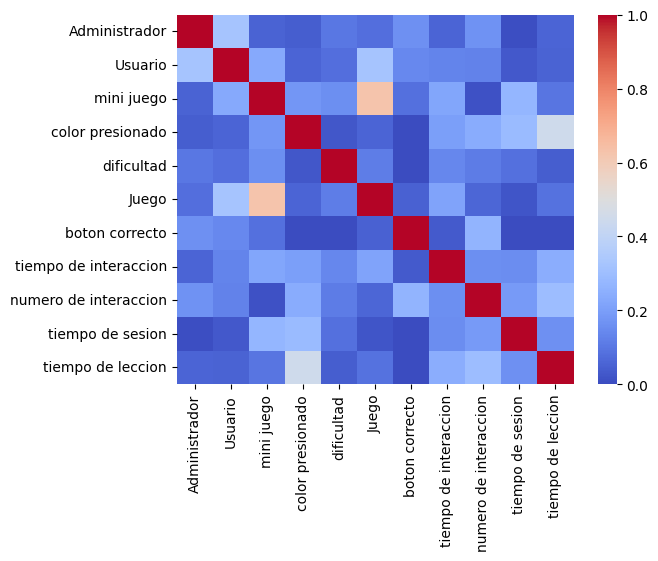

In [42]:
heat_map = sns.heatmap(corr_factors1, cmap = 'coolwarm')
heat_map

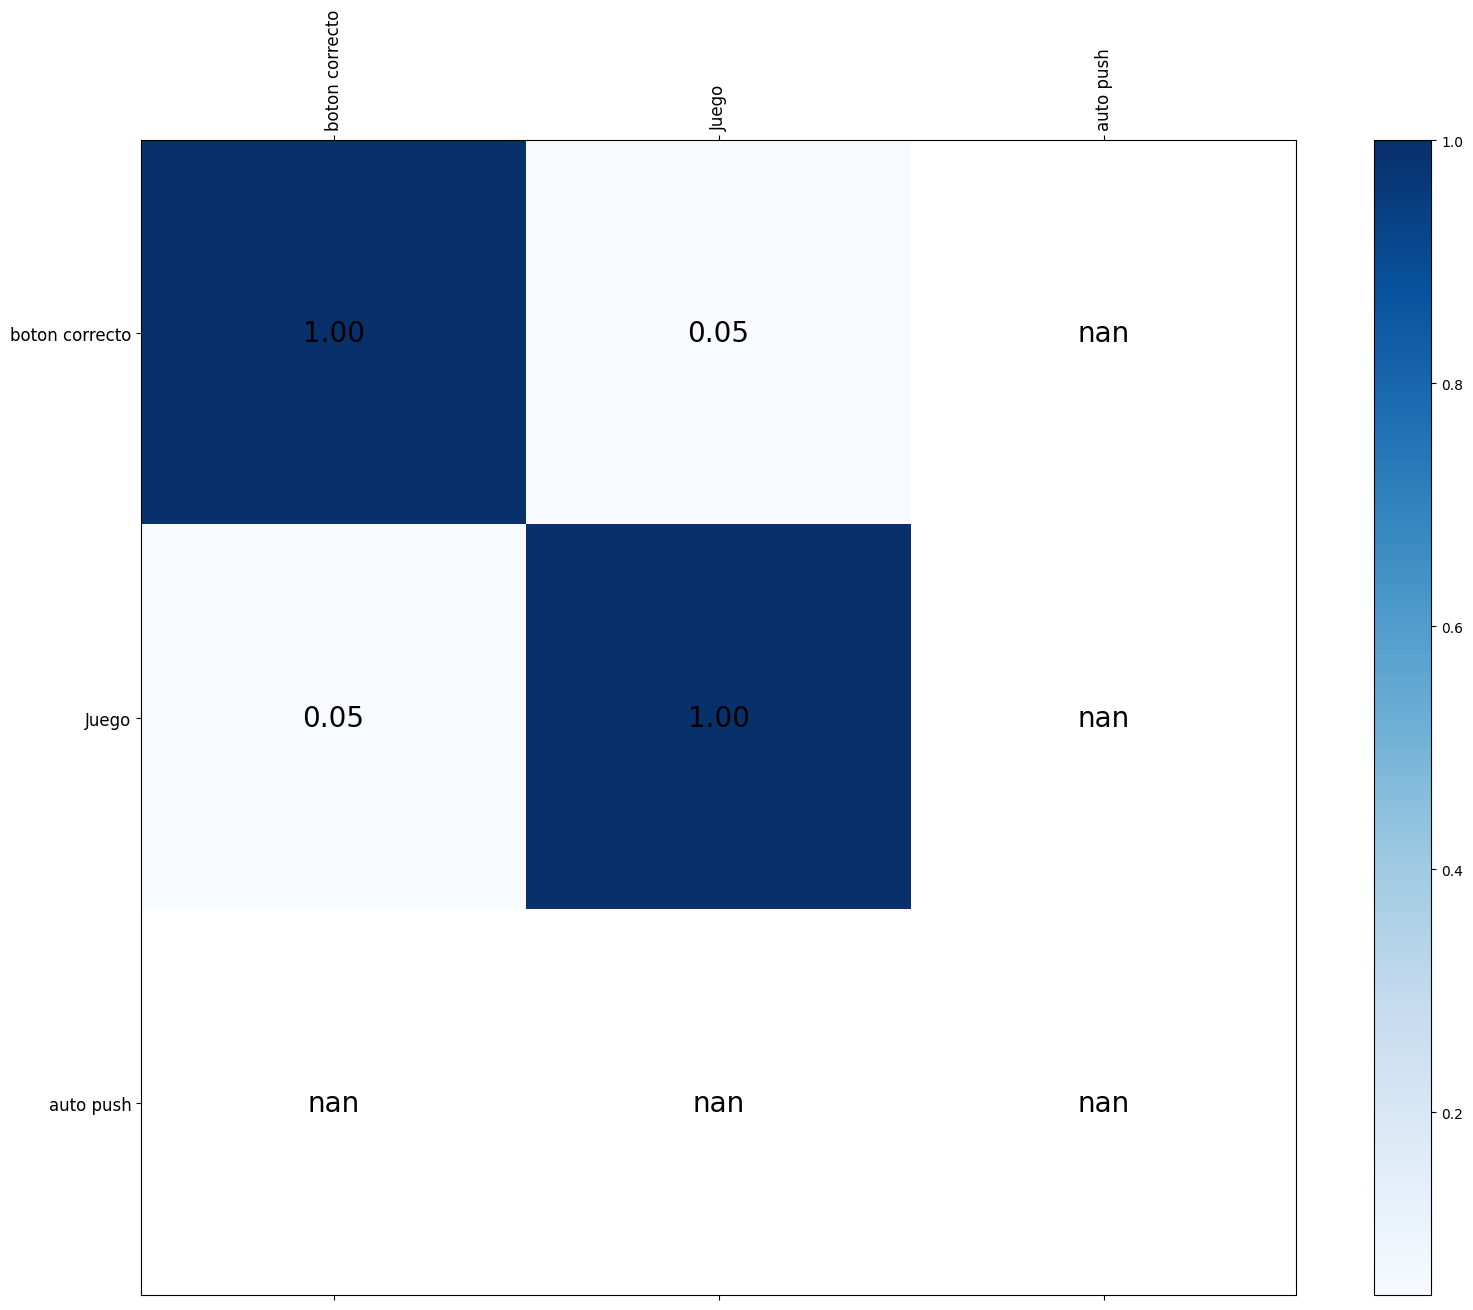

In [43]:
fig, ax = plt.subplots(figsize=(20, 15))
cax = ax.matshow(corr_factors3, cmap="Blues")
fig.colorbar(cax)

# Añadir anotaciones manualmente
for i in range(corr_factors3.shape[0]):
    for j in range(corr_factors3.shape[1]):
        ax.text(j, i, f"{corr_factors3.iloc[i, j]:.2f}", 
               ha="center", va="center", fontsize=20)

plt.xticks(range(len(corr_factors3.columns)), corr_factors3.columns, rotation=90, fontsize=12)
plt.yticks(range(len(corr_factors3.index)), corr_factors3.index, fontsize=12)
plt.savefig('General.png', dpi=300, bbox_inches='tight')
plt.show()

In [44]:
# --- REGRESIÓN LOGÍSTICA DE 10 CASOS (Análisis Adicional) ---

# Librerías necesarias
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Carga de datos
data = pd.read_csv("DataAnalytics.csv")
data.columns = [col.strip().lower().replace(" ", "_") for col in data.columns]

# Filtrar usuarios específicos
usuarios_evaluar = ["denisse", "concepcion", "carlos enrique", "carlos abel", "benjamin"]
data = data[data["usuario"].str.lower().isin([u.lower() for u in usuarios_evaluar])]

# Guardar nombre original de usuarios
data["usuario_original"] = data["usuario"]

# Codificar variables categóricas
le = LabelEncoder()
for col in ['usuario', 'administrador', 'mini_juego', 'color_presionado', 'dificultad', 'juego']:
    data[col] = le.fit_transform(data[col].astype(str))

# Crear variables dicotómicas
data['dificultad_dicotomica'] = (data['dificultad'] > 0).astype(int)
mini_juego_referencia = data['mini_juego'].value_counts().idxmax()
data['mini_juego_dicotomico'] = (data['mini_juego'] == mini_juego_referencia).astype(int)

# Imputar valores nulos
for col in data.columns:
    if data[col].dtype in [np.float64, np.int64]:
        data[col] = data[col].fillna(data[col].mean())

# Función para calcular métricas
def analizar_modelo(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
    return round(accuracy*100, 2), round(sensitivity*100, 2), round(specificity*100, 2)

# Definición de los 10 modelos
modelos = [
    {"nombre": "Botón Correcto vs Juego + Auto Push", "objetivo": "boton_correcto", "predictoras": ["juego", "auto_push"]},
    {"nombre": "Juego vs Botón Correcto + Auto Push", "objetivo": "juego", "predictoras": ["boton_correcto", "auto_push"]},
    {"nombre": "Auto Push vs Juego + Botón Correcto", "objetivo": "auto_push", "predictoras": ["juego", "boton_correcto"]},
    {"nombre": "Dificultad (Alta/Baja) vs Juego + Usuario", "objetivo": "dificultad_dicotomica", "predictoras": ["juego", "usuario"]},
    {"nombre": "Mini juego A vs Otros", "objetivo": "mini_juego_dicotomico", "predictoras": ["color_presionado", "numero_de_interaccion", "usuario"]},
    {"nombre": "Usuario Denisse vs Otros", "objetivo": "usuario_original", "usuario_target": "denisse", "predictoras": ["dificultad_dicotomica", "mini_juego_dicotomico", "auto_push"]},
    {"nombre": "Usuario Concepcion vs Otros", "objetivo": "usuario_original", "usuario_target": "concepcion", "predictoras": ["dificultad_dicotomica", "mini_juego_dicotomico", "auto_push"]},
    {"nombre": "Usuario Carlos Enrique vs Otros", "objetivo": "usuario_original", "usuario_target": "carlos enrique", "predictoras": ["dificultad_dicotomica", "mini_juego_dicotomico", "auto_push"]},
    {"nombre": "Usuario Carlos Abel vs Otros", "objetivo": "usuario_original", "usuario_target": "carlos abel", "predictoras": ["dificultad_dicotomica", "mini_juego_dicotomico", "auto_push"]},
    {"nombre": "Usuario Benjamin vs Otros", "objetivo": "usuario_original", "usuario_target": "benjamin", "predictoras": ["dificultad_dicotomica", "mini_juego_dicotomico", "auto_push"]}
]

# Entrenamiento y resultados
resultados = []
for modelo in modelos:
    X = data[modelo["predictoras"]]

    if "usuario_target" in modelo:
        y = (data["usuario_original"].str.lower() == modelo["usuario_target"]).astype(int)
    else:
        y = data[modelo["objetivo"]].astype(int)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc, sens, spec = analizar_modelo(y_test, y_pred)
    resultados.append({
        "Modelo Analizado": modelo["nombre"],
        "Precisión (%)": acc,
        "Sensibilidad (%)": sens,
        "Exactitud (%)": spec
    })

# Mostrar resultados en tabla
df_resultados = pd.DataFrame(resultados)
print(df_resultados)


                            Modelo Analizado  Precisión (%)  Sensibilidad (%)  \
0        Botón Correcto vs Juego + Auto Push          54.87            100.00   
1        Juego vs Botón Correcto + Auto Push          58.46              5.81   
2        Auto Push vs Juego + Botón Correcto          97.44              0.00   
3  Dificultad (Alta/Baja) vs Juego + Usuario          65.13             86.78   
4                      Mini juego A vs Otros          81.54              0.00   
5                   Usuario Denisse vs Otros          72.31             37.14   
6                Usuario Concepcion vs Otros          80.51              0.00   
7            Usuario Carlos Enrique vs Otros          66.67              0.00   
8               Usuario Carlos Abel vs Otros          97.44             50.00   
9                  Usuario Benjamin vs Otros          91.79              0.00   

   Exactitud (%)  
0           0.00  
1         100.00  
2         100.00  
3          29.73  
4         100

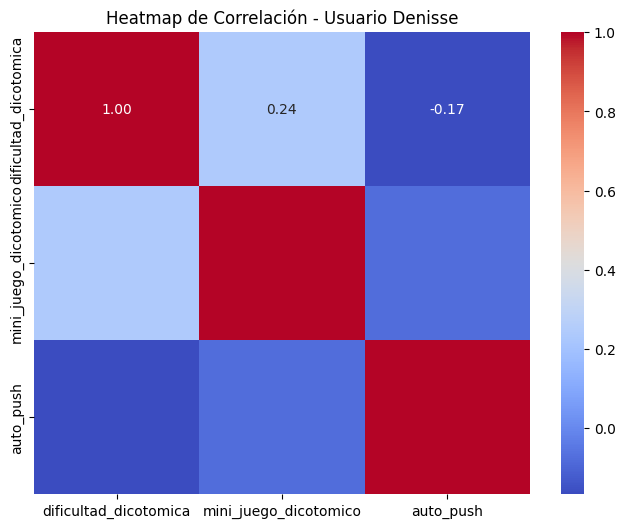

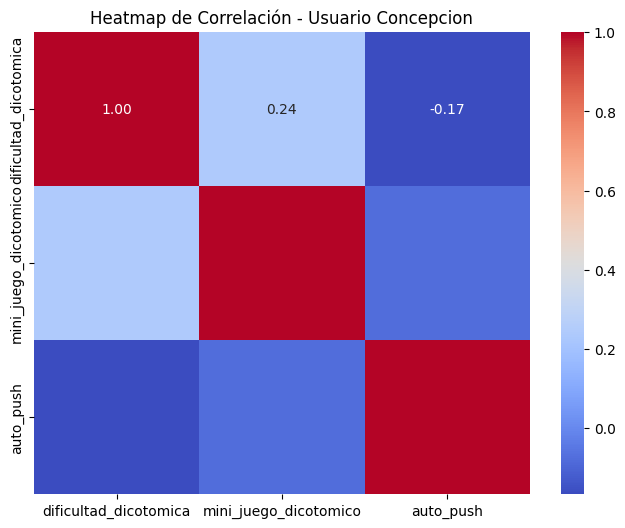

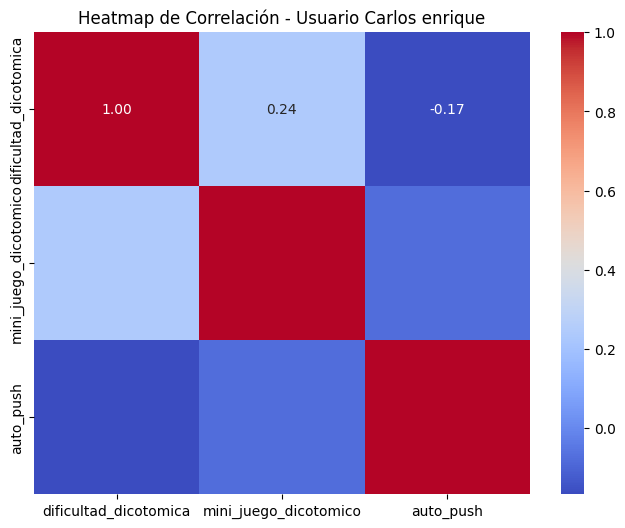

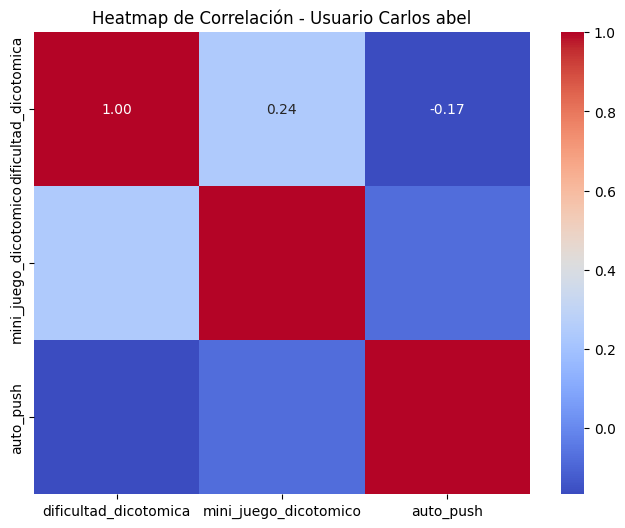

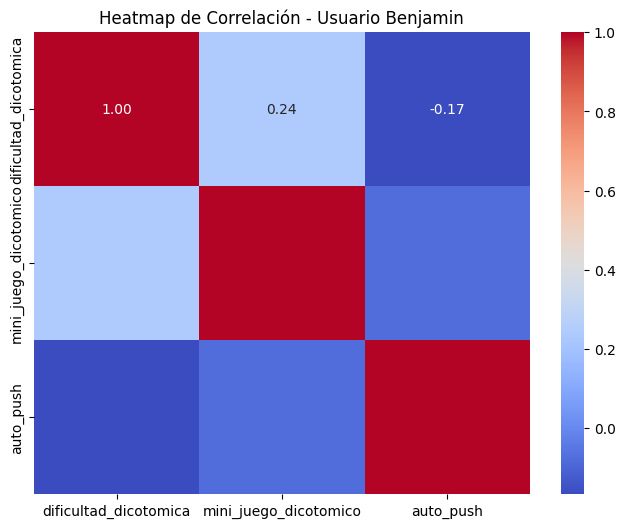

In [45]:
# --- HEATMAPS POR USUARIO ---

import seaborn as sns
import matplotlib.pyplot as plt

# Definir usuarios objetivo
usuarios_objetivo = ["denisse", "concepcion", "carlos enrique", "carlos abel", "benjamin"]

# Para cada usuario generar un heatmap de las variables predictoras
for usuario in usuarios_objetivo:
    y_usuario = (data["usuario_original"].str.lower() == usuario).astype(int)
    X_usuario = data[["dificultad_dicotomica", "mini_juego_dicotomico", "auto_push"]]

    # Calcular la matriz de correlación
    correlacion_usuario = X_usuario.corr()

    # Crear el heatmap
    plt.figure(figsize=(8,6))
    sns.heatmap(correlacion_usuario, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Heatmap de Correlación - Usuario {usuario.capitalize()}')
    plt.show()


In [49]:
print(df_model['auto push'].value_counts(dropna=False))


NameError: name 'df_model' is not defined

In [ ]:
df_model['auto push'] = df_model['auto push'].astype(str).str.strip().str.lower()
df_model['auto push'] = df_model['auto push'].map({
    '1': 1, '0': 0,
    'true': 1, 'false': 0,
    'sí': 1, 'si': 1, 'no': 0
})

In [ ]:
df_model['auto push'] = 1  # convierte toda la columna a 1

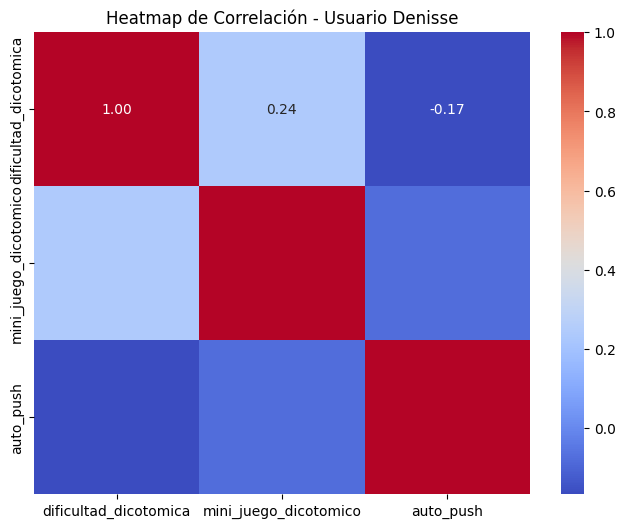

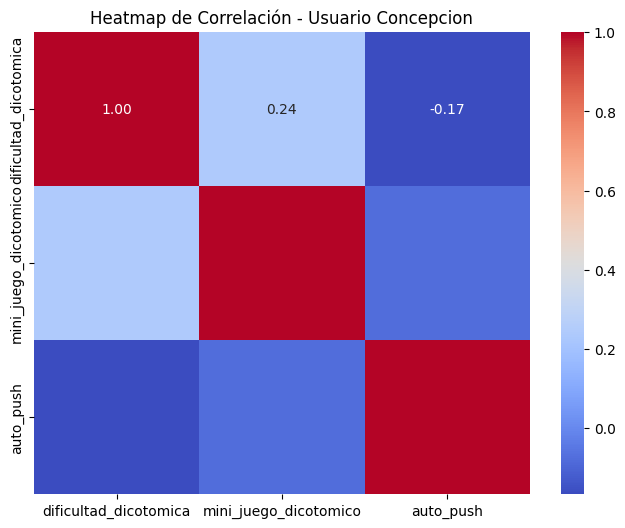

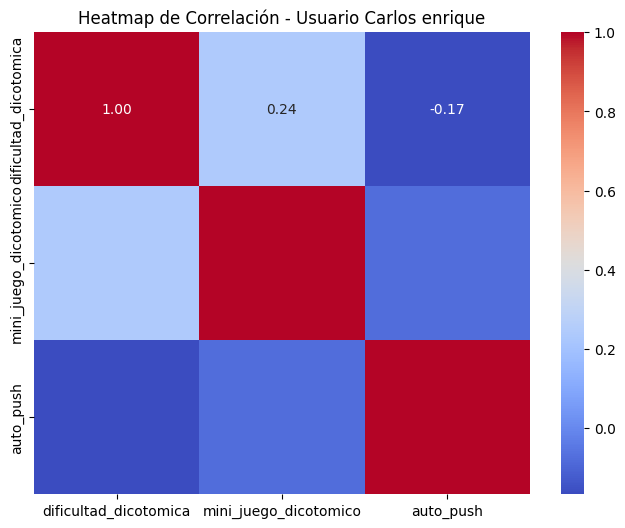

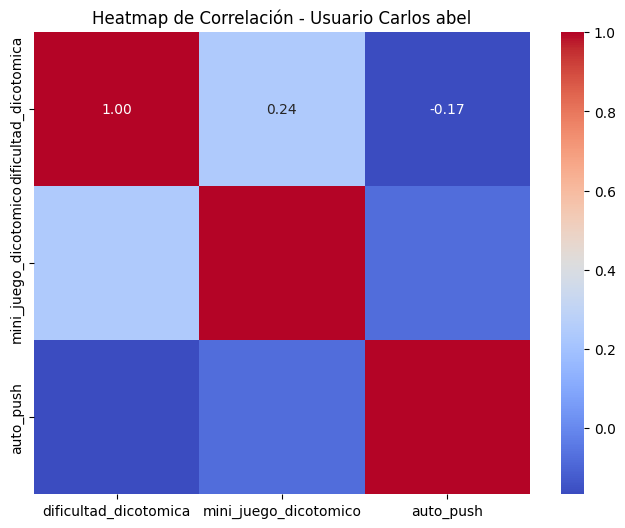

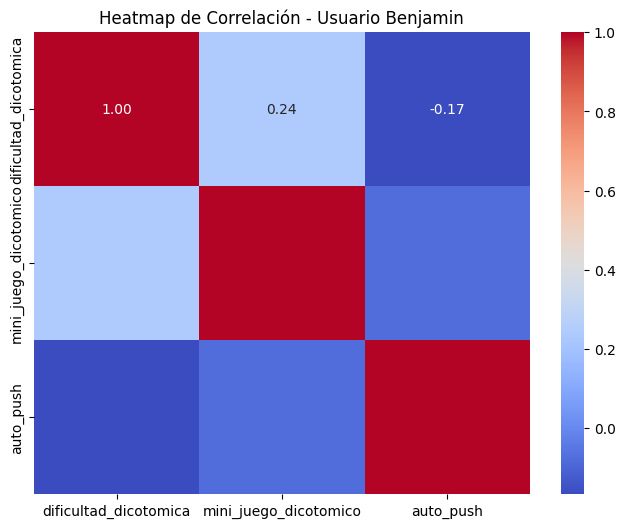

In [ ]:
# --- HEATMAPS POR USUARIO ---

import seaborn as sns
import matplotlib.pyplot as plt

# Definir usuarios objetivo
usuarios_objetivo = ["denisse", "concepcion", "carlos enrique", "carlos abel", "benjamin"]

# Para cada usuario generar un heatmap de las variables predictoras
for usuario in usuarios_objetivo:
    y_usuario = (data["usuario_original"].str.lower() == usuario).astype(int)
    X_usuario = data[["dificultad_dicotomica", "mini_juego_dicotomico", "auto_push"]]

    # Calcular la matriz de correlación
    correlacion_usuario = X_usuario.corr()

    # Crear el heatmap
    plt.figure(figsize=(8,6))
    sns.heatmap(correlacion_usuario, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Heatmap de Correlación - Usuario {usuario.capitalize()}')
    plt.show()

In [ ]:
print(df_model['auto push'].value_counts(dropna=False))
print(df_model['auto push'].describe())



Series([], Name: count, dtype: int64)
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: auto push, dtype: float64


In [50]:
valores_nulos = data.isnull().sum()
print(valores_nulos)

administrador            0
usuario                  0
boton_correcto           0
tiempo_de_interaccion    0
mini_juego               0
numero_de_interaccion    0
color_presionado         0
dificultad               0
fecha                    0
juego                    0
auto_push                0
tiempo_de_leccion        0
tiempo_de_sesion         0
usuario_original         0
dificultad_dicotomica    0
mini_juego_dicotomico    0
dtype: int64
